In [13]:
! pip install statsmodels


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn import metrics

In [15]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

#### Visualização dos dados temporais que existem no dataset 

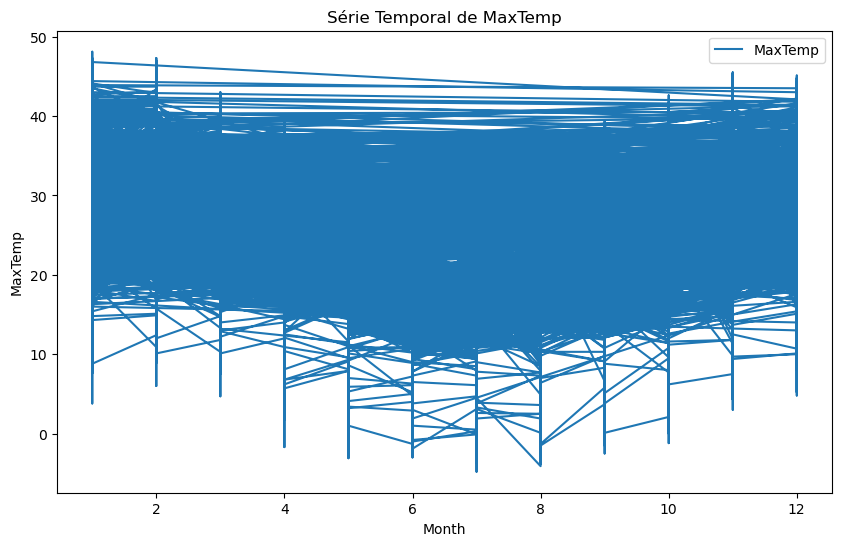

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['MaxTemp'], label='MaxTemp')
plt.xlabel('Month')
plt.ylabel('MaxTemp')
plt.title('Série Temporal de MaxTemp')
plt.legend()
plt.show()

In [17]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [18]:
model = ExponentialSmoothing(train['MaxTemp'], seasonal='add', seasonal_periods=12)
fit_model = model.fit()


In [19]:
predictions = fit_model.forecast(len(test))

In [20]:
print('R2:', metrics.r2_score(test['MaxTemp'], predictions))
print('MAE:', metrics.mean_absolute_error(test['MaxTemp'], predictions))
print('MSE:', metrics.mean_squared_error(test['MaxTemp'], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test['MaxTemp'], predictions)))

R2: -0.011427085966012163
MAE: 6.591764467408419
MSE: 59.66498362240432
RMSE: 7.724311206988253
